

# Project: Investigate Football Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Bibliography">Bibliography</a></li>
</ul>

<a id='intro'></a>
## Introduction

Let's import the necessary packages for the analysis

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

%matplotlib inline




>**Data**<br>
The data selected to the analysis is the "soccer data set". Here you can find information about soccer matches, teams attributes an players performance. After exploring, i formulated the following questions:

>**Questions**<br>
>**Leagues**<br>
>1) How do goals per league have changed over time?<br>
>2) Which league scored the most goals (seasons 15/16)?<br>
>**Teams**<br>
>3) Is a certain type of team attributes associated with winning?<br>
>4) Which champion team score more goals and make more points? season 15/16<br>
>5) Is a certain type of team attributes associated with winning a league?<br>
>**Player**<br>
>6) Which players had the highest penalties attribute by league? season 15/16<br>
>7) Which is the players preferred foot?<br>
>8) Is a highest penalties attribute associated with age?<br>
>9) Is a highest stamina attribute associated with age?)<br>


**This is how a get the data from sql:**

**Code:**

**I join different tables to create table MATCHES**

>CREATE TABLE Matches_1 AS<br>
>SELECT d.team_long_name as away_team,A.ID, C.NAME, B.name, A.season, A.stage, A.date,A.match_api_id, A.home_team_api_id,<br> A.away_team_api_id, a.home_team_goal,<br>
>a.away_team_goal,a.home_player_1, a.home_player_2, a.home_player_3, a.home_player_4, a.home_player_5, a.home_player_6,<br>
>a.home_player_7, a.home_player_8, a.home_player_9, a.home_player_10, a.home_player_11, a.away_player_1, a.away_player_2,<br>
>a.away_player_3, a.away_player_4, a.away_player_5, a.away_player_6, a.away_player_7, a.away_player_8, a.away_player_9,<br>
>a.away_player_10, a.away_player_11<br>
>FROM Match A<br>
>LEFT JOIN League B ON A.league_id=B.country_id<br>
>LEFT JOIN Country C ON A.league_id=C.ID<br>
>left join Team D on a.away_team_api_id=d.team_api_id<br>
>WHERE season in ("2011/2012","2012/2013","2013/2014","2014/2015","2015/2016");<br>

>CREATE TABLE MATCHES AS<br>
>select q.team_long_name as home_team, p.*<br>
>from Matches_1 p<br>
>left join Team q on p.home_team_api_id=q.team_api_id};<br>

**creation of teams dataset**

>create table teams AS<br>
>select n.team_long_name,n.team_short_name, m.* from Team_Attributes m<br>
>LEFT JOIN Team n on m.team_api_id=n.team_api_id;<br>


**creation of players dataset**
>create table PLAYERS AS<br>
>select x.player_name, x.birthday, x.height, x.weight,y.* from Player x<br>
>left join Player_Attributes y on x.player_api_id=y.player_api_id<br>
>where y.date>='2011-01-01';<br>



<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I'll load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

**Loading data**

In [527]:
#I load the data from the csv files and create the dataframes
df_matches=pd.read_csv('matches.csv')
df_players=pd.read_csv('players.csv')
df_teams=pd.read_csv('teams.csv')


**Checking for cleanliness**

In [528]:
df_teams.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [8]:
df_players.head()

,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [530]:
df_matches.head()

,home_team,away_team,id,name,name:1,season,stage,date,match_api_id,home_team_api_id,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,Oud-Heverlee Leuven,RSC Anderlecht,757,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-29 00:00:00,1032692,1773,...,38389.0,208493.0,149150.0,40536.0,38253.0,114333.0,178249.0,265123.0,46552.0,181276.0
1,RAEC Mons,Standard de Liège,758,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032693,9998,...,129462.0,245653.0,164229.0,33620.0,38969.0,17276.0,119117.0,38382.0,248689.0,46335.0
2,KRC Genk,Beerschot AC,759,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032694,9987,...,57078.0,38800.0,174363.0,27508.0,38784.0,163613.0,38371.0,33622.0,166679.0,14487.0
3,KAA Gent,KSV Cercle Brugge,760,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032695,9991,...,38342.0,243250.0,37047.0,38789.0,27110.0,166670.0,188231.0,277766.0,38251.0,209855.0
4,Sporting Lokeren,SV Zulte-Waregem,761,Belgium,Belgium Jupiler League,2011/2012,1,2011-07-30 00:00:00,1032696,9994,...,37100.0,41005.0,46877.0,80678.0,37886.0,131530.0,208984.0,NaN,208852.0,240044.0


In [10]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142220 entries, 0 to 142219
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_name          142220 non-null  object 
 1   birthday             142220 non-null  object 
 2   height               142220 non-null  float64
 3   weight               142220 non-null  int64  
 4   id                   142220 non-null  int64  
 5   player_fifa_api_id   142220 non-null  int64  
 6   player_api_id        142220 non-null  int64  
 7   date                 142220 non-null  object 
 8   overall_rating       142131 non-null  float64
 9   potential            142131 non-null  float64
 10  preferred_foot       142131 non-null  object 
 11  attacking_work_rate  142023 non-null  object 
 12  defensive_work_rate  142131 non-null  object 
 13  crossing             142131 non-null  float64
 14  finishing            142131 non-null  float64
 15  heading_accuracy 

In [560]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [11]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home_team         16163 non-null  object 
 1   away_team         16163 non-null  object 
 2   id                16163 non-null  int64  
 3   name              16163 non-null  object 
 4   name:1            16163 non-null  object 
 5   season            16163 non-null  object 
 6   stage             16163 non-null  int64  
 7   date              16163 non-null  object 
 8   match_api_id      16163 non-null  int64  
 9   home_team_api_id  16163 non-null  int64  
 10  away_team_api_id  16163 non-null  int64  
 11  home_team_goal    16163 non-null  int64  
 12  away_team_goal    16163 non-null  int64  
 13  home_player_1     16026 non-null  float64
 14  home_player_2     15992 non-null  float64
 15  home_player_3     15994 non-null  float64
 16  home_player_4     15966 non-null  float6



### Data Cleaning

In this section, i'll proceed to clean each dataframe

**renaming columns**

In [531]:
#Giving the correct name to strange columns names 
df_matches=df_matches.rename(columns={'name':'country','name:1':'League'})

**Lowercase columns names**

In [532]:
#Lowercase columns name helps you to work more easily with data
df_teams.rename(columns=lambda x: x.strip().lower(),inplace=True)
df_players.rename(columns=lambda x: x.strip().lower(),inplace=True)
df_matches.rename(columns=lambda x: x.strip().lower(),inplace=True)

**Dropping unnecessary columns**

In [533]:
#columns that wont be used in the analysis
df_players.drop(['id','player_fifa_api_id','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','crossing','heading_accuracy','short_passing','volleys','long_passing','marking','standing_tackle','sliding_tackle'],axis=1, inplace=True)
df_teams.drop(['id','team_fifa_api_id','buildupplayspeed','buildupplaydribbling','buildupplaydribblingclass','buildupplaypassing','chancecreationpassing','chancecreationcrossing','chancecreationshooting','defencepressure','defenceaggression','defenceteamwidth'],axis=1,inplace=True)
df_matches.drop(['stage'], axis=1, inplace=True)

**Incorrect data types**

In [ ]:
df_players['date']=pd.to_datetime(df_players['date'])
df_players['birthday']=pd.to_datetime(df_players['birthday'])

In [ ]:
df_teams['date']=pd.to_datetime(df_teams['date'])

In [ ]:
df_matches['date']=pd.to_datetime(df_matches['date'])

**Adding age column in players dataframe**

In [537]:
#Later on, age we will be necessary for the analysis
def age_finder(birthday):
    r = relativedelta(pd.to_datetime('now'), birthday) 
    return '{}'.format(r.years)

df_players['age'] = df_players['birthday'].apply(age_finder)

**NA values**

In [19]:
#dropping rows with NA values because these ones won't help us in the analysis
df_players.dropna(inplace=True)
df_teams.dropna(inplace=True)
df_matches.dropna(inplace=True)


In [572]:
#checking the team column names
df_teams.columns

Index(['team_api_id', 'date', 'buildupplayspeedclass',
       'buildupplaypassingclass', 'buildupplaypositioningclass',
       'chancecreationpassingclass', 'chancecreationcrossingclass',
       'chancecreationshootingclass', 'chancecreationpositioningclass',
       'defencepressureclass', 'defenceaggressionclass',
       'defenceteamwidthclass', 'defencedefenderlineclass'],
      dtype='object')

**Checking if any columns have null values**

In [20]:
df_players.isnull().sum().any()

False

In [21]:
df_teams.isnull().sum().any()

False

In [22]:
df_matches.isnull().sum().any()

False

**checking for duplicates**

In [576]:
sum(df_matches.duplicated())

0

In [577]:
sum(df_players.duplicated())

0

In [24]:
sum(df_teams.duplicated())

0

In [23]:
df_teams.drop_duplicates(inplace=True)

**combining two columns in matches dataframe**

In [546]:
# i combine this columns because i want to split this new column into two rows so i can feel more confortable working the data
df_matches['teams'] = df_matches[['home_team', 'away_team']].apply(lambda x: '/'.join(x), axis = 1) 

In [547]:
cols = df_matches.columns.tolist()

In [548]:
cols = cols[-1:] + cols[:-1]

In [351]:
df_matches=df_matches[cols]

**Creating copies of the matches dataframe**

In [549]:
df1=df_matches.copy()
df2=df_matches.copy()

**Splitting columns**

In [550]:
#here i split the column into two different dataframes that later i will append
split_columns=['teams']
for c in split_columns:

    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

>**df1**<br>
In this section i will work the first dataframe created after i splited the previous dataframe. This first dataframe is conformed by all the home teams.

In [84]:
#checking column names
df1.columns

Index(['home_team', 'away_team', 'id', 'country', 'league', 'season', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'teams'],
      dtype='object')

In [1253]:
#i want to know if the team is winner or loser of the match or if the match ended up in a Tie
def result(c):
    
    if c['home_team_goal']>c['away_team_goal']:
        return 'Winner'
    elif c['home_team_goal']<c['away_team_goal']:
        return 'Loser'
    else:
        return 'Tie'


In [1254]:
#applying the function
df1['result']=df1.apply(result, axis=1)

In [553]:
#i want to know how many point the team got
def points(c):
        
    if c['result']=='winner':
        return 3
    elif c['result']=='loser':
        return 0
    else:
        return 1


In [554]:
#applying the function
df1['points']=df1.apply(points,axis=1)

In [419]:
df1

,teams,home_team,away_team,id,country,league,season,date,match_api_id,home_team_api_id,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result,points
0,Oud-Heverlee Leuven,Oud-Heverlee Leuven,RSC Anderlecht,757,Belgium,Belgium Jupiler League,2011/2012,29/07/11,1032692,1773,...,149150.0,40536.0,38253.0,114333.0,178249.0,265123.0,46552.0,181276.0,winner,3
1,RAEC Mons,RAEC Mons,Standard de Liège,758,Belgium,Belgium Jupiler League,2011/2012,30/07/11,1032693,9998,...,164229.0,33620.0,38969.0,17276.0,119117.0,38382.0,248689.0,46335.0,tie,1
2,KRC Genk,KRC Genk,Beerschot AC,759,Belgium,Belgium Jupiler League,2011/2012,30/07/11,1032694,9987,...,174363.0,27508.0,38784.0,163613.0,38371.0,33622.0,166679.0,14487.0,winner,3
5,KV Kortrijk,KV Kortrijk,Lierse SK,762,Belgium,Belgium Jupiler League,2011/2012,30/07/11,1032697,8571,...,38788.0,41947.0,111973.0,192323.0,32760.0,181073.0,27423.0,33098.0,tie,1
6,KV Mechelen,KV Mechelen,Sint-Truidense VV,763,Belgium,Belgium Jupiler League,2011/2012,30/07/11,1032698,8203,...,7683.0,148313.0,38354.0,37972.0,37866.0,68120.0,104415.0,68226.0,winner,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,FC Zürich,FC Zürich,FC Thun,25973,Switzerland,Switzerland Super League,2015/2016,13/09/15,1992089,10243,...,67304.0,67389.0,133126.0,186524.0,93223.0,121115.0,25809.0,289732.0,tie,1
16158,FC St. Gallen,FC St. Gallen,FC Thun,25975,Switzerland,Switzerland Super League,2015/2016,22/09/15,1992091,10190,...,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,winner,3
16159,FC Vaduz,FC Vaduz,FC Luzern,25976,Switzerland,Switzerland Super League,2015/2016,23/09/15,1992092,9824,...,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,loser,0
16160,Grasshopper Club Zürich,Grasshopper Club Zürich,FC Sion,25977,Switzerland,Switzerland Super League,2015/2016,23/09/15,1992093,9956,...,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,winner,3


In [555]:
#dropping uncessary columns
df1.drop(['id','away_team_api_id','away_player_1', 'away_player_2', 'away_player_3','away_player_4', 'away_player_5', 'away_player_6', 'away_player_7','away_player_8', 'away_player_9', 'away_player_10', 'away_player_11'], axis=1,inplace=True)

In [556]:
#renaming the df columns so i can append both df1 and df2
df1=df1.rename(columns={'teams':'team','home_team_api_id':'team_api_id','home_player_1':'player_1', 'home_player_2':'player_2', 'home_player_3':'player_3','home_player_4':'player_4', 'home_player_5':'player_5', 'home_player_6':'player_6', 'home_player_7':'player_7','home_player_8':'player_8', 'home_player_9':'player_9', 'home_player_10':'player_10', 'home_player_11':'player_11'})

In [557]:
#creating the score column
df1['score'] = df1['home_team_goal'].map(str) + '-' + df1['away_team_goal'].map(str)

In [558]:
#creating the match_goals column
df1['match_goals']=df1['home_team_goal']+df1['away_team_goal']

In [559]:
df1['team_goals']=df1['home_team_goal']

In [597]:
df1

,home_team,away_team,country,league,season,date,match_api_id,team_api_id,home_team_goal,away_team_goal,...,player_8,player_9,player_10,player_11,team,result,points,score,match_goals,team_goals
0,Oud-Heverlee Leuven,RSC Anderlecht,Belgium,Belgium Jupiler League,2011/2012,2011-07-29,1032692,1773,2,1,...,37963.0,38777.0,45865.0,68114.0,Oud-Heverlee Leuven,Winner,1,2-1,3,2
1,RAEC Mons,Standard de Liège,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032693,9998,1,1,...,37128.0,149258.0,26224.0,78902.0,RAEC Mons,Tie,1,1-1,2,1
2,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032694,9987,3,1,...,169200.0,43158.0,42153.0,38794.0,KRC Genk,Winner,1,3-1,4,3
5,KV Kortrijk,Lierse SK,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032697,8571,1,1,...,95615.0,9213.0,38231.0,157561.0,KV Kortrijk,Tie,1,1-1,2,1
6,KV Mechelen,Sint-Truidense VV,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032698,8203,2,1,...,37112.0,178291.0,39145.0,38792.0,KV Mechelen,Winner,1,2-1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,FC Zürich,FC Thun,Switzerland,Switzerland Super League,2015/2016,2015-09-13,1992089,10243,3,3,...,632356.0,198082.0,194532.0,42262.0,FC Zürich,Tie,1,3-3,6,3
16158,FC St. Gallen,FC Thun,Switzerland,Switzerland Super League,2015/2016,2015-09-22,1992091,10190,1,0,...,67333.0,119839.0,143790.0,195215.0,FC St. Gallen,Winner,1,1-0,1,1
16159,FC Vaduz,FC Luzern,Switzerland,Switzerland Super League,2015/2016,2015-09-23,1992092,9824,1,2,...,358156.0,32343.0,531309.0,37257.0,FC Vaduz,Loser,1,1-2,3,1
16160,Grasshopper Club Zürich,FC Sion,Switzerland,Switzerland Super League,2015/2016,2015-09-23,1992093,9956,2,0,...,147959.0,451983.0,80564.0,289472.0,Grasshopper Club Zürich,Winner,1,2-0,2,2


>**df2**<br>
In this section i will work the second dataframe created after i splited the previous dataframe. I'll do the same i did with df1. This dataframe is conformed by all the away teams

In [94]:
df2.columns

Index(['home_team', 'away_team', 'id', 'country', 'league', 'season', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'teams'],
      dtype='object')

In [560]:
def result_2(c):
    
    if c['home_team_goal']<c['away_team_goal']:
        return 'winner'
    elif c['home_team_goal']>c['away_team_goal']:
        return 'loser'
    else:
        return 'tie'


In [561]:
df2['result']=df2.apply(result_2, axis=1)

In [562]:
def points_2(c):
        
    if c['result']=='winner':
        return 3
    elif c['result']=='loser':
        return 0
    else:
        return 1


In [563]:
df2['points']=df2.apply(points_2,axis=1)

In [564]:
df2.drop(['id','home_team_api_id','home_player_1', 'home_player_2', 'home_player_3','home_player_4', 'home_player_5', 'home_player_6', 'home_player_7','home_player_8', 'home_player_9', 'home_player_10', 'home_player_11'], axis=1,inplace=True)

In [565]:
df2=df2.rename(columns={'teams':'team','away_team_api_id':'team_api_id','away_player_1':'player_1', 'away_player_2':'player_2', 'away_player_3':'player_3','away_player_4':'player_4', 'away_player_5':'player_5', 'away_player_6':'player_6', 'away_player_7':'player_7','away_player_8':'player_8', 'away_player_9':'player_9', 'away_player_10':'player_10', 'away_player_11':'player_11'})

In [566]:
df2['score'] = df2['home_team_goal'].map(str) + '-' + df2['away_team_goal'].map(str)
df2['score'] = df2['home_team_goal'].map(str) + '-' + df2['away_team_goal'].map(str)

In [567]:
df2['match_goals'] = df2['home_team_goal'] + df2['away_team_goal']

In [568]:
df2['team_goals'] = df2['away_team_goal']

In [607]:
df2

,home_team,away_team,country,league,season,date,match_api_id,team_api_id,home_team_goal,away_team_goal,...,player_8,player_9,player_10,player_11,team,result,points,score,match_goals,team_goals
0,Oud-Heverlee Leuven,RSC Anderlecht,Belgium,Belgium Jupiler League,2011/2012,2011-07-29,1032692,8635,2,1,...,178249.0,265123.0,46552.0,181276.0,RSC Anderlecht,loser,0,2-1,3,1
1,RAEC Mons,Standard de Liège,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032693,9985,1,1,...,119117.0,38382.0,248689.0,46335.0,Standard de Liège,tie,1,1-1,2,1
2,KRC Genk,Beerschot AC,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032694,9993,3,1,...,38371.0,33622.0,166679.0,14487.0,Beerschot AC,loser,0,3-1,4,1
5,KV Kortrijk,Lierse SK,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032697,9989,1,1,...,32760.0,181073.0,27423.0,33098.0,Lierse SK,tie,1,1-1,2,1
6,KV Mechelen,Sint-Truidense VV,Belgium,Belgium Jupiler League,2011/2012,2011-07-30,1032698,9997,2,1,...,37866.0,68120.0,104415.0,68226.0,Sint-Truidense VV,loser,0,2-1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,FC Zürich,FC Thun,Switzerland,Switzerland Super League,2015/2016,2015-09-13,1992089,10191,3,3,...,93223.0,121115.0,25809.0,289732.0,FC Thun,tie,1,3-3,6,3
16158,FC St. Gallen,FC Thun,Switzerland,Switzerland Super League,2015/2016,2015-09-22,1992091,10191,1,0,...,93223.0,121115.0,232110.0,289732.0,FC Thun,loser,0,1-0,1,0
16159,FC Vaduz,FC Luzern,Switzerland,Switzerland Super League,2015/2016,2015-09-23,1992092,10199,1,2,...,201704.0,36382.0,34082.0,95257.0,FC Luzern,winner,3,1-2,3,2
16160,Grasshopper Club Zürich,FC Sion,Switzerland,Switzerland Super League,2015/2016,2015-09-23,1992093,10179,2,0,...,482200.0,95230.0,451335.0,275122.0,FC Sion,loser,0,2-0,2,0


**confirm both are identical**

In [569]:
df1.columns==df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

**renaming dataframes**

In [570]:
df_home_teams=df1

In [106]:
df_away_teams=df2

**combine dataframes to add to the original dataframe**

In [572]:
df_matches_v2 = df1.append(df2)

**creating matches season 2015/2016 dataframe**

In [573]:
df_matches_1516=df_matches_v2.query('season=="2015/2016"')

**creating teams season 2015/2016 dataframe**

In [594]:
df_teams_1516=df_teams.query('date>"01-07-2015"')

**creating players season 2015/2016 dataframe**

In [982]:
df_players_1516=df_players.query('date>"01-07-2015"')

**Creating players leagues seanson 2015/2016 dataframe**

In [1033]:
players_league=df_matches_1516.iloc[:,np.r_[3:4,10:20]].set_index('league').unstack(level=0).reset_index()

In [1034]:
players_league.drop('level_0',axis=1,inplace=True)

In [1040]:
players_league=players_league.rename(columns={0:'player_api_id'})

In [1050]:
players_league.drop_duplicates(inplace=True)

In [ ]:
df_players_1516_v2=df_players_1516.drop_duplicates(subset=['player_name'])

In [ ]:
df_players_1516_v3=df_players_1516_v2.merge(players_league, left_on='player_api_id', right_on='player_api_id', how='left')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 0: When do leagues usually start and finish?

In [591]:
leagues=df_matches_1516['league'].unique()

for league_name in leagues:
    start_date=df_matches_1516.query('league==@league_name').date.min()
    end_date=df_matches_1516.query('league==@league_name').date.max()

    print (f' The league {league_name} started in {start_date} and finished in {end_date}')

 The league Belgium Jupiler League started in 2015-07-24 00:00:00 and finished in 2016-03-13 00:00:00
 The league England Premier League started in 2015-08-08 00:00:00 and finished in 2016-05-17 00:00:00
 The league France Ligue 1 started in 2015-08-07 00:00:00 and finished in 2016-05-14 00:00:00
 The league Germany 1. Bundesliga started in 2015-08-14 00:00:00 and finished in 2016-05-14 00:00:00
 The league Italy Serie A started in 2015-08-22 00:00:00 and finished in 2016-05-15 00:00:00
 The league Netherlands Eredivisie started in 2015-08-08 00:00:00 and finished in 2016-05-08 00:00:00
 The league Poland Ekstraklasa started in 2015-07-17 00:00:00 and finished in 2016-04-09 00:00:00
 The league Portugal Liga ZON Sagres started in 2015-08-14 00:00:00 and finished in 2016-05-15 00:00:00
 The league Scotland Premier League started in 2015-08-01 00:00:00 and finished in 2016-05-15 00:00:00
 The league Spain LIGA BBVA started in 2015-08-21 00:00:00 and finished in 2016-05-15 00:00:00
 The l

**We can see that season 15/16 leagues started between july and augost and the vast majority finished in may 2016.**

### Research Question 1: How do goals per league have changed over time?

In [246]:
leagues_goals_time=df_matches_v2.groupby(['league','season'])['team_goals'].sum().unstack(level=0)


In [251]:
leagues_goals_time['Poland Ekstraklasa'].fillna(0,inplace=True)

In [260]:
#dropping leagues with missing values
leagues_goals_time.drop(['Belgium Jupiler League','Poland Ekstraklasa'],axis=1,inplace=True)

Text(0.5, 1.0, 'Goals over time by league')

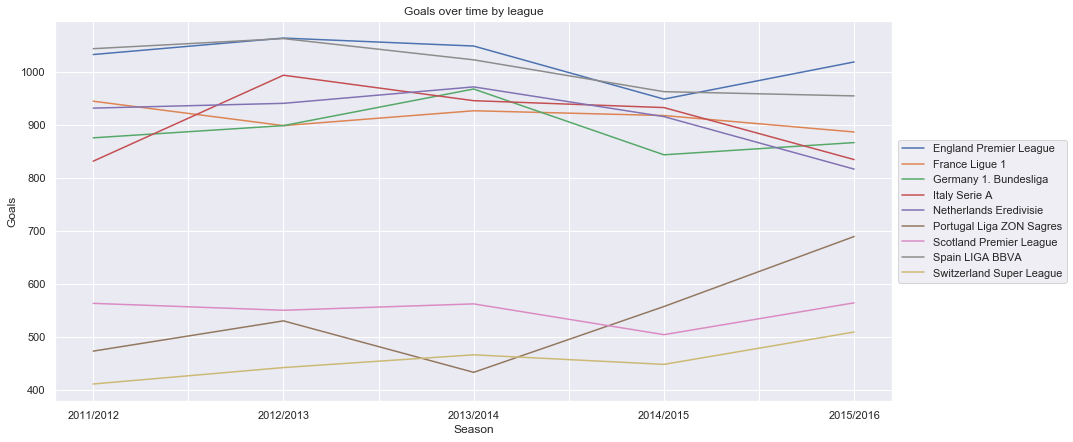

In [264]:
#creating the plot
fig, ax = plt.subplots(figsize=(15,7))

leagues_goals_time.plot(ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Goals')
plt.xlabel('Season')
plt.title('Goals over time by league')

**In this plot, we can see that there are two different leagues groups. One is more competitive than other. The first group is conformed by Premiere League, France Ligue 1, Bundesliga, Liga BBVA, Italy Seria A and Eredvisie. Also, we can see that the quantity of goals have been consistent over time. On the other hand, the Switzerland Super League is the one with the lowest quantity of goals**

### Research Question 2: Which league scored the most goals (seasons 15/16)?

In [128]:
#seaborn format
sns.set_style('darkgrid')

**get goals for each league**

In [323]:
league_goals=df_matches_1516.groupby('league').team_goals.sum().sort_values(ascending=False)

In [324]:
league_goals.index

Index(['England Premier League', 'Spain LIGA BBVA', 'France Ligue 1',
       'Germany 1. Bundesliga', 'Italy Serie A', 'Netherlands Eredivisie',
       'Portugal Liga ZON Sagres', 'Belgium Jupiler League',
       'Scotland Premier League', 'Poland Ekstraklasa',
       'Switzerland Super League'],
      dtype='object', name='league')

**chart**

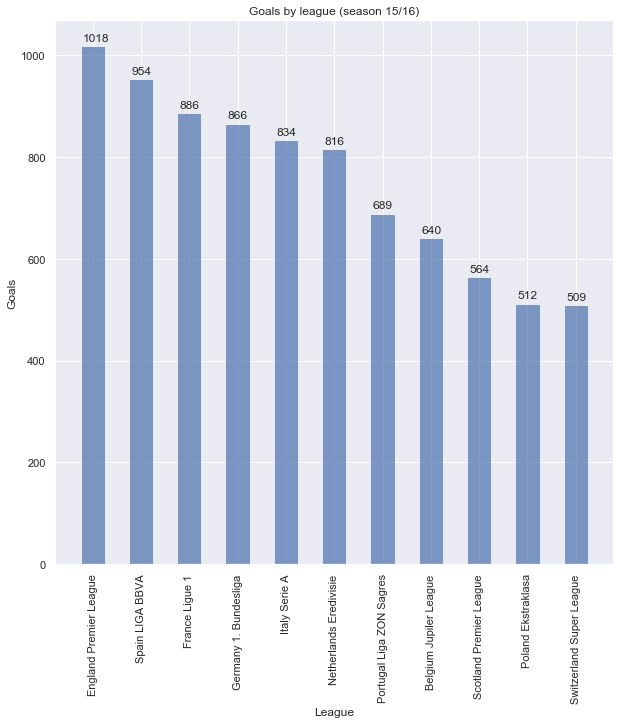

In [325]:
ind=np.arange(len(league_goals))
width=0.5
bars=plt.bar(ind,league_goals,width,alpha=.7)

#title and labels
plt.ylabel('Goals')
plt.xlabel('League')
plt.title('Goals by league (season 15/16)')
locations=ind
labels=['England Premier League', 'Spain LIGA BBVA', 'France Ligue 1',
       'Germany 1. Bundesliga', 'Italy Serie A', 'Netherlands Eredivisie',
       'Portugal Liga ZON Sagres', 'Belgium Jupiler League',
       'Scotland Premier League', 'Poland Ekstraklasa',
       'Switzerland Super League']
plt.xticks(locations,labels,rotation='vertical')

for i, v in enumerate(league_goals):
    plt.text(ind[i] - 0.20, v + 10.0, str(v))

    
sns.set(rc={'figure.figsize':(10,10)})
    


**The England Premiere League is the one in which more goals were scored in season 2015/2016. The one with less goals scored is the Switzerland Super League**

### Research Question 3  (Do more matches implies more goals scored?)

In [422]:
matches_goals=df_matches_v2.groupby(['league','season']).agg(
                    matches=('match_api_id','nunique'),
                    goals_sum=('team_goals','sum'))


In [424]:
matches_goals.reset_index(inplace=True)

In [399]:
#finding belgium and poland leagues rows
Belgium=matches_goals[matches_goals['league'].str.contains('Belgium Jupiler League')]
Poland=matches_goals[matches_goals['league'].str.contains('Poland Ekstraklasa')]

In [400]:
#im dropping this leagues because there is missing data that wont let me make a good analysis
matches_goals.drop(Belgium.index,inplace=True)
matches_goals.drop(Poland.index,inplace=True)

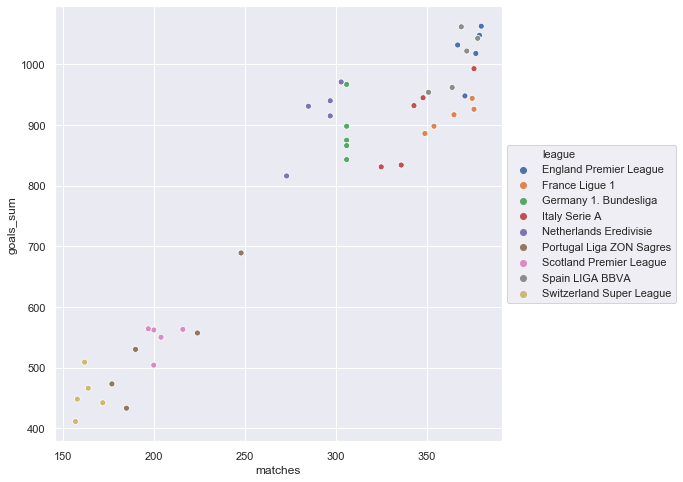

In [415]:
#scatterplot 
sp =sns.scatterplot(x="matches", y="goals_sum",
              hue="league",
              data=matches_goals);

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set(rc={'figure.figsize':(8,8)})

**We can see that the correlation is possitive between quantity of goals and matches. As more matches are played, more goals are scored.**

### Research Question 4  (Which champion team scored more goals? season 15/16)

In [934]:
score_list_1516=df_matches_1516.groupby(['league','team','team_api_id']).agg(
                    points=('points','sum'),
                    goals_sum=('team_goals','sum'),
                    matches=('match_api_id','nunique'))

In [935]:
#filling all blanks
score_list_1516.reset_index(inplace=True)

In [937]:
winners_leagues=score_list_1516[score_list_1516['points']==score_list_1516.groupby(['league']).points.transform('max')]

In [939]:
top_teams_attributes = winners_leagues.merge(df_teams_1516, left_on='team_api_id', right_on='team_api_id', how='left')

In [943]:
points=top_teams_attributes.groupby(['team']).points.sum()
topteams_goals=top_teams_attributes.groupby(['team']).goals_sum.sum()
topteams_matches=top_teams_attributes.groupby(['team']).matches.sum()

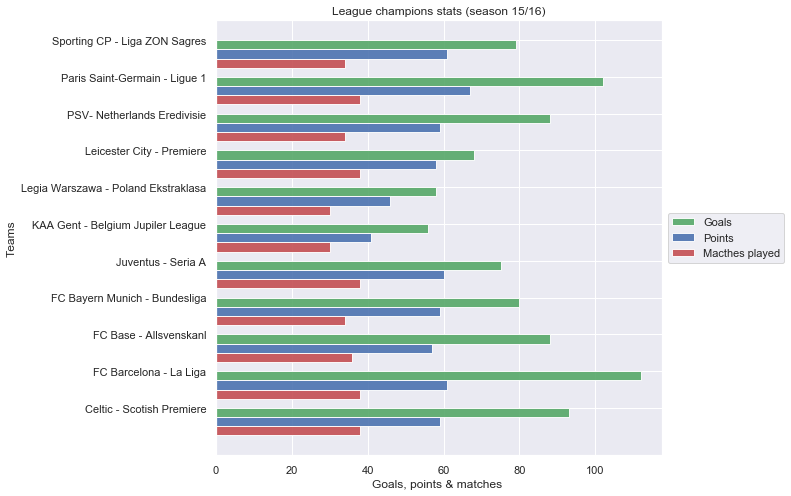

In [1252]:
ind2=np.arange(len(topteams_goals))

width = 0.25

green_bars=plt.barh(ind,topteams_goals,width,color='g',alpha=.9,label='Goals')
white_bars=plt.barh(ind-width,points,width,color='b',alpha=.9,label='Points')
red_bar=plt.barh(ind-width-width,topteams_matches,width,color='r',alpha=.9,label='Macthes played')


plt.ylabel('Teams')
plt.xlabel('Goals, points & matches ')
plt.title('League champions stats (season 15/16)')

locations=ind+width/2

labels=['Celtic - Scotish Premiere', 'FC Barcelona - La Liga', 'FC Base - Allsvenskanl', 'FC Bayern Munich - Bundesliga', 'Juventus - Seria A',
       'KAA Gent - Belgium Jupiler League', 'Legia Warszawa - Poland Ekstraklasa', 'Leicester City - Premiere', 'PSV- Netherlands Eredivisie',
       'Paris Saint-Germain - Ligue 1', 'Sporting CP - Liga ZON Sagres']

plt.yticks(locations,labels)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



**FC Barcelona scored more goals than the other champions. Also, we can see that FC barcelona play the same amount of matches. So they score more goals in each match they play than the others.**

### Research Question 5  (Is a certain type of team attributes associated with winning a league? season 15/16)

**Creating the pie plot**

In [680]:
columns= top_teams_attributes.columns
att_cols= columns[columns.str.contains("class")].tolist()

In [729]:
att_counts=top_teams_attributes.agg({i:'value_counts' for i in att_cols})

In [741]:
att_counts_final=att_counts.unstack().unstack().fillna(0).reset_index()

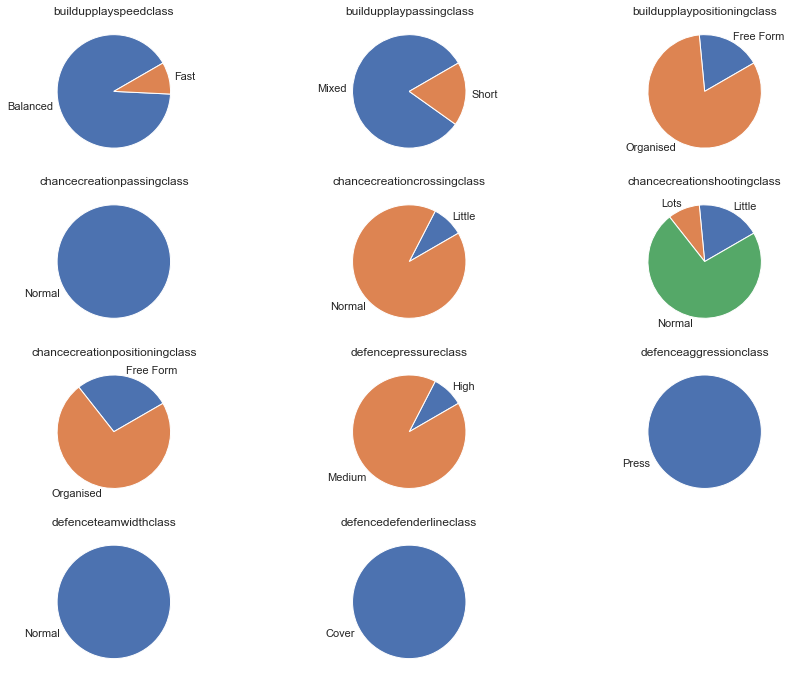

In [978]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.delaxes(axes[3][2])

for i, (idx, row) in enumerate(att_counts_final.set_index('index').iterrows()):
       
        ax = axes[i // 3, i % 3]
        row = row[row.gt(row.sum() * .01)]
        ax.pie(row, labels=row.index, startangle=30)
        ax.set_title(idx)
        
        
fig.subplots_adjust(wspace=.2)

**We can definitely see that champions teams have a type of attribute that makes them win leagues. The vast majority tend to have a:

>1)Build up play<br>
>speed class: Normal<br>
>passing class: mixed<br>
>positioning class: organised<br>

>2)chance creation<br>
>passing class: Normal<br>
>crossing class: Normal<br>
>shooting class: Normal<br>
>positioning class: Organized<br>

>3)Defence<br>
>pressure class: Medium<br>
>aggression class: Press<br>
>team width class: Normal<br>
>defender line class: Cover<br>

## Players dataframe analysis

In [1190]:
df_players_1516_v3['age']=df_players_1516_v3['age'].astype('int')

In [1228]:
df_players_1516_v3[['height','weight','age','penalties','stamina','overall_rating']].describe()

,height,weight,age,penalties,stamina,overall_rating
count,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000,7647.000000
mean,181.920732,168.103308,31.251733,53.459134,66.088662,69.310449
std,6.431845,15.089446,4.543227,15.912924,14.584111,6.209830
min,160.020000,123.000000,21.000000,9.000000,10.000000,47.000000
25%,177.800000,159.000000,28.000000,44.000000,60.000000,65.000000
50%,182.880000,168.000000,31.000000,55.000000,69.000000,69.000000
75%,185.420000,179.000000,34.000000,65.000000,75.000000,74.000000
max,208.280000,243.000000,49.000000,96.000000,95.000000,94.000000


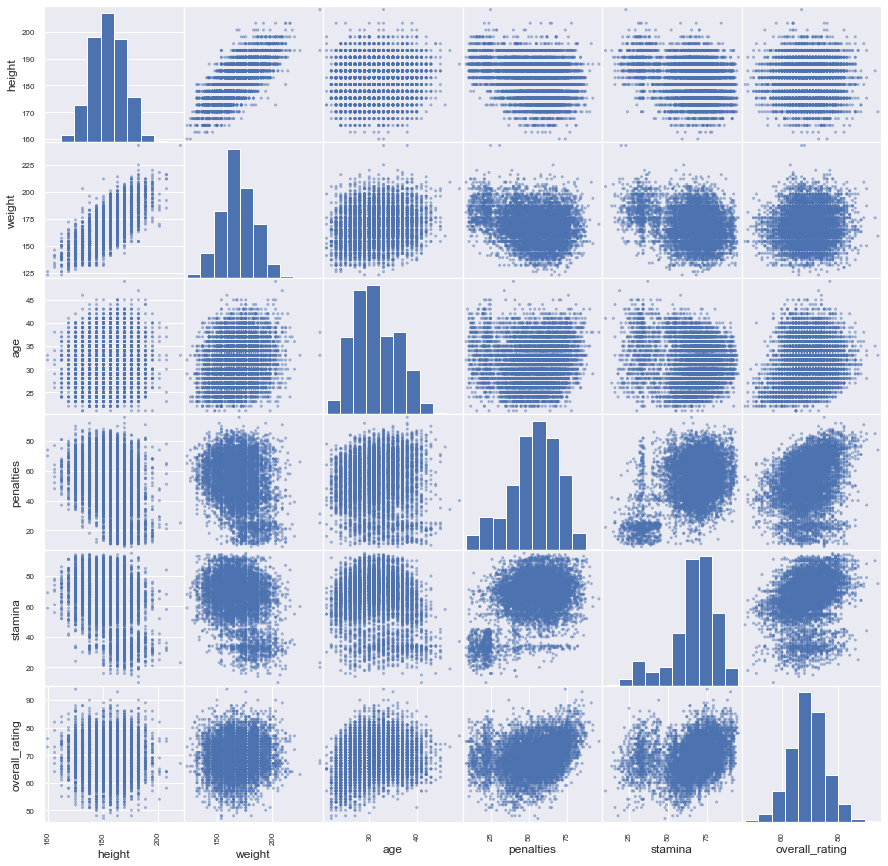

In [1230]:
pd.plotting.scatter_matrix(df_players_1516_v3[['height','weight','age','penalties','stamina','overall_rating']],figsize=(15,15));

### Research Question 6  (Which players had the highest penalties attribute by league? season 15/16)

In [1107]:
highest_penaltie_attribute=df_players_1516_v3[df_players_1516_v3['penalties']==df_players_1516_v3.groupby(['league']).penalties.transform('max')]

In [1131]:
highest_penaltie_attribute_v2=highest_penaltie_attribute.drop_duplicates(subset=['league'])

In [1143]:
highest_penaltie_attribute_v3=highest_penaltie_attribute_v2.groupby(['league','player_name'])['penalties'].max()

In [1148]:
highest_penaltie_attribute_v3

league                    player_name          
Belgium Jupiler League    Timmy Simons              90
England Premier League    Rickie Lambert            96
France Ligue 1            Zlatan Ibrahimovic        91
Germany 1. Bundesliga     Charles Aranguiz          88
Italy Serie A             Mario Balotelli           92
Netherlands Eredivisie    Dirk Kuyt                 87
Poland Ekstraklasa        Airam Cabrera             76
Portugal Liga ZON Sagres  Andre Andre               86
Scotland Premier League   Kris Boyd                 82
Spain LIGA BBVA           Giuseppe Rossi            87
Switzerland Super League  Matias Emilio Delgado     84
team                                               NaN
Name: penalties, dtype: object

The players shown above were the ones who have more chances to score in a penaltie because of their skills at that time.

### Research Question 7  (Which is the players preferred foot?) season 15/16)

In [1166]:
preferred_foot=df_players_1516_v3['preferred_foot'].value_counts()

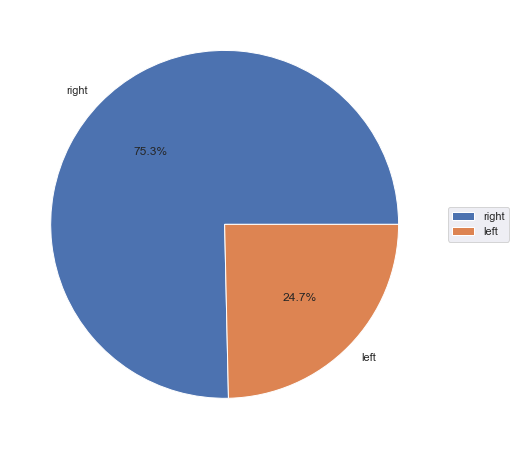

In [1172]:
labels='right','left'
plt.pie(preferred_foot,labels=labels,autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

75.3% of all players prefers to play with their right foot

### Research Question 8 (Is a highest penalties attribute associated with age?) season 15/16)

In [1217]:
median=df_players_1516_v3['age'].median()
low=df_players_1516_v3.query(f'age < {median}')
high=df_players_1516_v3.query(f'age >= {median}')

In [1218]:
mean_penalties_low=low['penalties'].mean()
mean_penalties_high=high['penalties'].mean()

Text(0, 0.5, 'average penalties attribues')

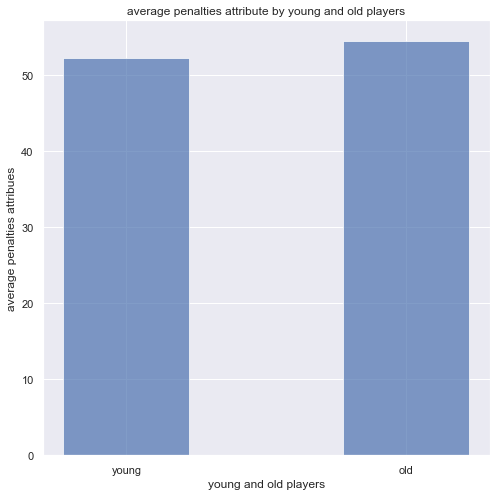

In [1250]:
locations=[1,2]
heights=[mean_penalties_low,mean_penalties_high]
labels=['young','old']
width=0.45
plt.bar(locations,heights,width,alpha=0.7,tick_label=labels)

plt.title('average penalties attribute by young and old players')
plt.xlabel('young and old players')
plt.ylabel('average penalties attribues')


Older players have a higher penalties attributes than the youngers one. This might be because of their experience in the soccer field and how they have developt their technique over time.

### Research Question 9 (Is a highest stamina attribute associated with age?) season 15/16)

In [1232]:
mean_stamina_low=low['stamina'].mean()
mean_stamina_high=high['stamina'].mean()

Text(0, 0.5, 'average stamina attributes')

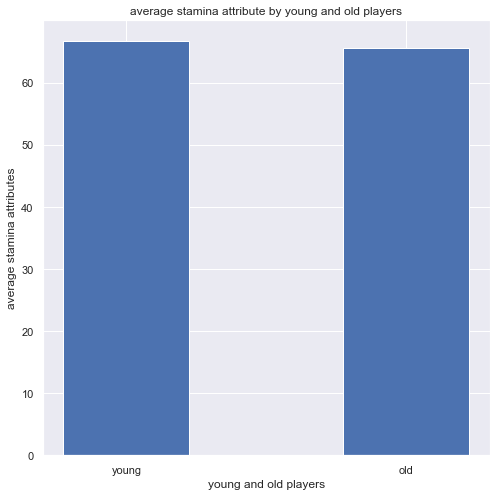

In [1256]:
locations=[1,2]
heights=[mean_stamina_low,mean_stamina_high]
labels=['young','old']
width=0.45
plt.bar(locations,heights,width,tick_label=labels)

plt.title('average stamina attribute by young and old players')
plt.xlabel('young and old players')
plt.ylabel('average stamina attributes')

Youngers players have a better stamina attribute. It means that the ability to sustain prolonged physical or mental effort in a match
of players decrease as they get old.

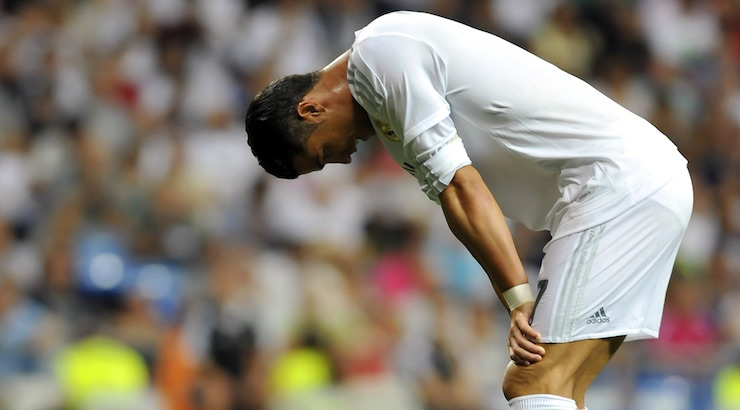

<a id='Bibliography'></a>
# Bibliogaphy

>https://www.kite.com/python/answers/how-to-change-the-pandas-datetime-format-in-python<br>
>https://stackoverflow.com/questions/51491893/how-do-i-get-an-age-in-years-and-date-on-pandas<br>
>http://www.datasciencemadesimple.com/concatenate-two-columns-dataframe-pandas-python-2/<br>
>https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html<br>
>https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot<br>
>https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot<br>
>https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas<br>
>https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-multiple-functions-at-once<br>
>https://stackoverflow.com/questions/44773714/convert-index-to-column-pandas-dataframe<br>
>https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row<br>
>https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot/44980867<br>
>https://datatofish.com/pie-chart-matplotlib/<br>
